In [192]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import math

In [121]:
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
# kde.score_samples(X)

In [122]:
# 参数定义
beta = 0.5
threshold = 0.1
k = 250

In [4]:
csv_data=pd.read_csv('./temp_data/wxh.csv',header=None,sep=',')
df = pd.DataFrame(csv_data)

In [8]:
# df

In [26]:
# df.iloc[1]

In [33]:
cluster_csv_data=pd.read_csv('./temp_data/kmeans_result.csv',header=None,sep=',')
cluster_df = pd.DataFrame(cluster_csv_data)
cluster_df = cluster_df.rename(columns={0:'cluster'})

In [6]:
# cluster_df

In [10]:
# g = cluster_df.groupby(0)

In [11]:
# print(g)

In [28]:
# list(g)

In [10]:
m_df = pd.concat([df,cluster_df],axis=1)
grouped_df = m_df.groupby('cluster')

In [9]:
#历史数据
# for group_name, group_data in grouped_df:
#     print('group_name')
#     print(group_name)
#     print('group_data')
#     print(group_data)
#     print("____________________________________")

In [11]:
#run这段会崩
# temp_history = []
# temp_history_list = []
# cluster_history = {}
# grouped_dict = dict(list(grouped_df))
# for i in range(k):
#     temp_history_list = []
#     for k in range(24):
#         temp_history = []
#         for j in range(8):
#             print(grouped_dict[i][j*24+k])
#             temp_history = temp_history + grouped_dict[i][j*24+k]
#         temp_history_list.append(temp_history)
#     cluster_history[i] = temp_history_list

In [13]:
list(grouped_dict[0][23])

[0.0,
 0.297834932,
 0.148962376,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.170185965,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.144875185,
 0.055294845,
 0.028273273999999998,
 0.003477113,
 0.02447754,
 0.461078465,
 0.468208685,
 0.055294845,
 0.027283862000000002,
 0.034827703,
 0.047134603,
 0.073371059,
 0.475040464,
 0.093544655,
 0.055909864000000004,
 0.057523658,
 0.0,
 0.0,
 0.006489113,
 0.0,
 0.0,
 0.0,
 1.027526258,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.512107744,
 0.048041184,
 0.0,
 0.512107744,
 0.512107744,
 0.0,
 0.0,
 0.8567543459999999,
 0.0,
 0.0,
 0.44267910299999996,
 0.098773496,
 0.55949002,
 0.796098992,
 0.007148505,
 0.0,
 0.227266957,
 0.0,
 0.46027182,
 0.0,
 0.519674246,
 0.0,
 0.377000845,
 0.0,
 0.37377327899999996,
 0.307683682,
 0.0,
 0.16382274300000002,
 0.048196377,
 0.0,
 0.0,
 0.26601828899999996,
 0.072726147,
 0.0,
 0.36650985,
 0.0,
 0.535068505,
 0.0,
 0.0,
 0.0,


In [ ]:
m_df.columns.values

In [183]:
#实时数据
realtime_csv_data=pd.read_csv('./data_2/20111129.csv',header=None,sep=',')
realtime_df_temp = pd.DataFrame(realtime_csv_data)
# realtime_df_temp.drop(0, axis=1, inplace=True)
# realtime_df_temp.drop(1, axis=1, inplace=True)
realtime_df_temp.drop(2, axis=1, inplace=True)

In [184]:
#时段合并
for i in range(24):
    realtime_df_temp[99+i] = realtime_df_temp[4*i+3] + realtime_df_temp[4*i+4] + realtime_df_temp[4*i+5] + realtime_df_temp[4*i+6]

for i in range(3,99):
    realtime_df_temp.drop(i, axis=1, inplace=True)

In [185]:
#加聚类标签
merged_realtime_df = pd.concat([realtime_df_temp,cluster_df],axis=1)

In [186]:
grouped_realtime_dict = dict(tuple(merged_realtime_df.groupby('cluster')))

temp_realtime_list = []
cluster_realtime = {}  #实时数据

for i in range(k):
    temp_realtime_list = []
    for j in range(24):
        temp_realtime_list.append(grouped_realtime_dict[i][99+j].tolist())
    cluster_realtime[i] = temp_realtime_list

In [36]:
# 0组0-1时段所有点
grouped_realtime_dict[0][99].values.tolist()

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [75]:
realtime_df

In [155]:
#input data->同类数据(list) recent_r->当前道路流量(float)
#ouput final

def get_probability(recent_r, data):    
    unique_data = np.unique(data)
    resdata = []
    for ii in unique_data:
        resdata.append(data.count(ii))    
    #自定义函数 e指数形式
    def func(x, a, u, sig):
        return  a*(np.exp(-(x - u) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig))*(431+(4750/x))
    #定义x、y散点坐标
    x = unique_data
    x=np.array(x)
    num = resdata
    y = np.array(num)
    popt, pcov = curve_fit(func, x, y,p0=[10,np.mean(data),(np.max(data)-np.mean(data))/3],maxfev = 10000000)
    #获取popt里面是拟合系数
    a = popt[0]
    u = popt[1]
    sig = popt[2]
    
    yvals = func(x,a,u,sig) #拟合y值
    q = stats.norm.cdf(recent_r,loc = u,scale = sig)
    final=1-q

    return final

0.8302738263802023
0.0021278864328002334
0.002764893204281401
0.0023845989281498703
0.007908150984665751
0.001932749151916104
0.0008278011256566422
0.03377215946676854
0.002692284354005433
0.0023091421364736147
0.007679410279548511
0.010702814698335584
0.02767096908582998
0.002197234278614143
0.0036216829171082025
0.00350389568668864
0.018424644997754834
0.0009411249625602141
0.009423705305325155
0.002236775041486702


/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0.014315194634964076
0.002631640015435078
0.007298627053138028
0.002397153398504265
0.00961970524941357
0.0023330148158595128
0.019857627138480178
0.008466428481837636
0.04185951363580913
0.012658605247281013


LinAlgError: singular matrix

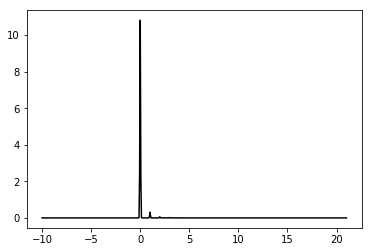

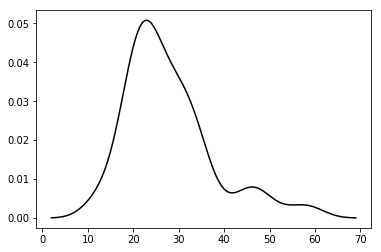

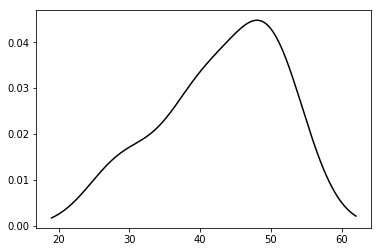

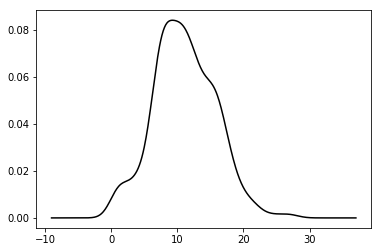

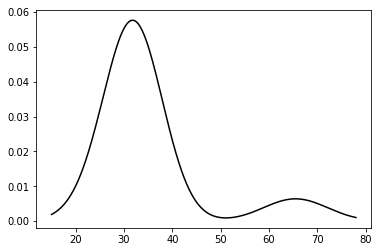

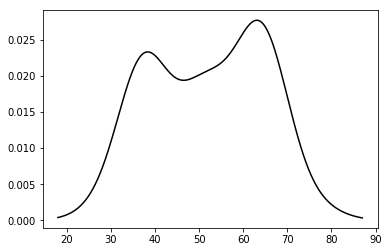

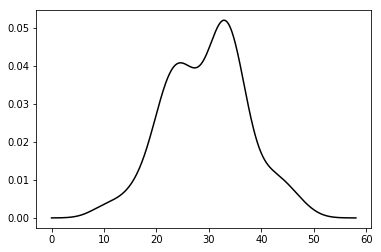

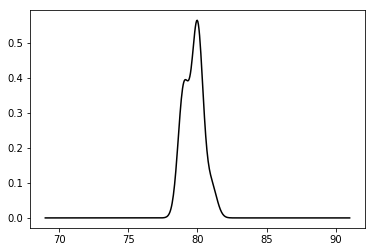

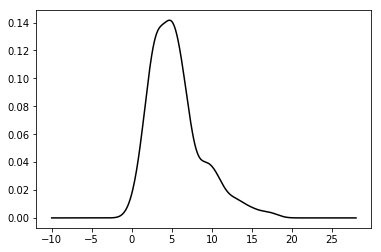

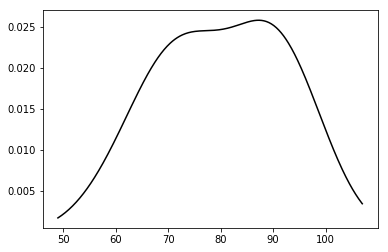

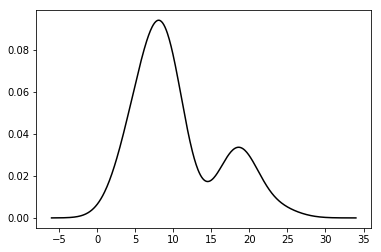

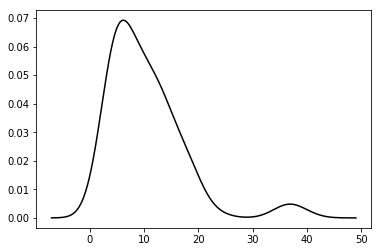

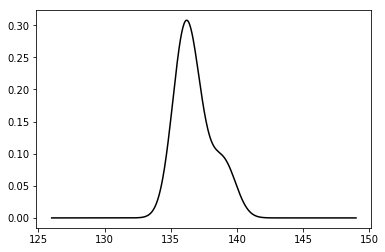

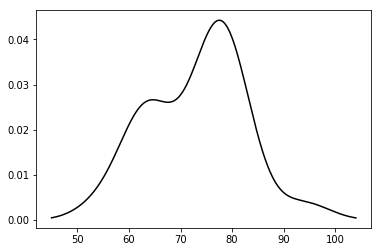

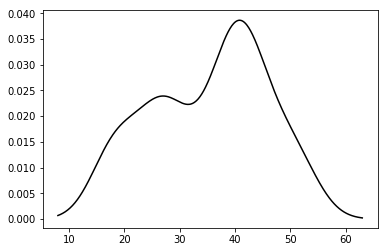

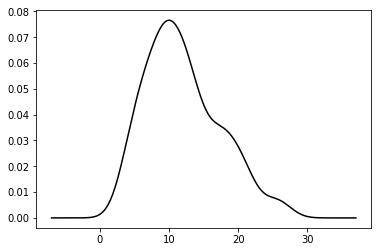

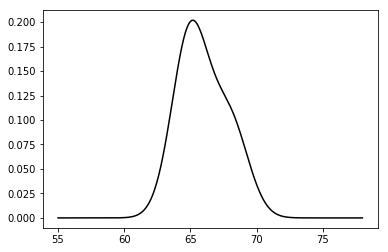

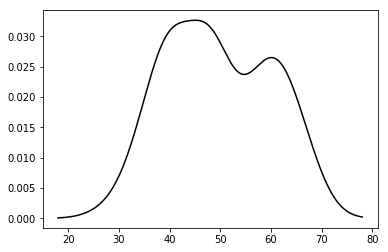

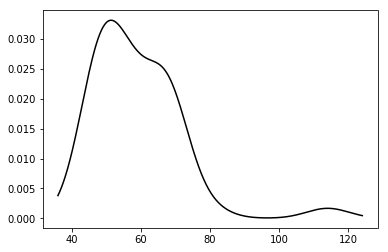

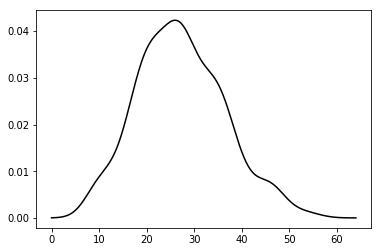

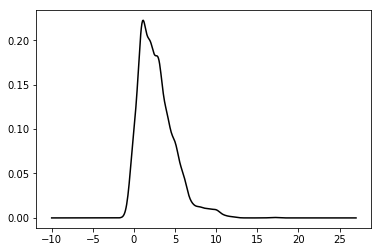

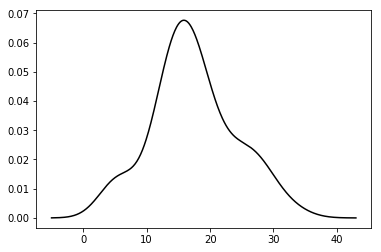

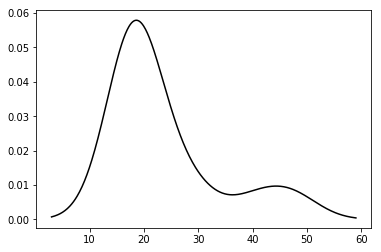

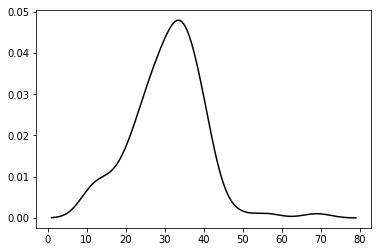

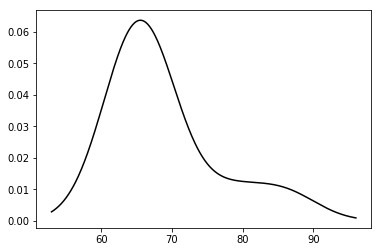

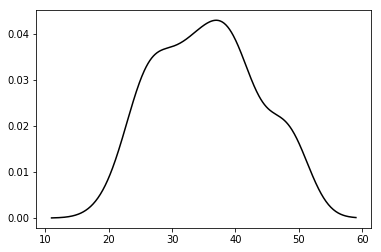

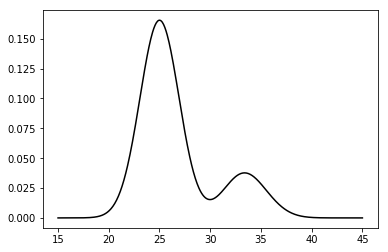

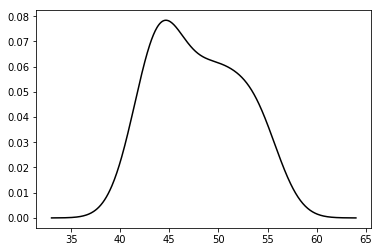

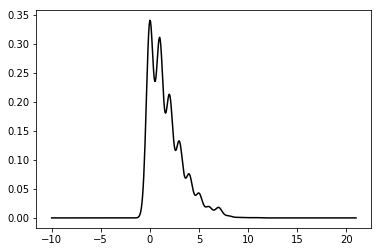

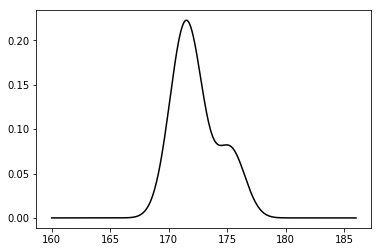

In [240]:
realtime_params = {}
for i in range(250):
#     realtime_params[i] = get_probability(0, grouped_realtime_dict[i][99].values.tolist())
    kde_cal(grouped_realtime_dict[i][100].values.tolist())

In [157]:
realtime_params

{0: 0.5067027450901491,
 1: 0.9999994037885174,
 2: 0.9999999999999941,
 3: 0.9997356042917347,
 4: 0.0,
 5: 0.9995218535359404,
 6: 0.9999860775411112,
 7: 1.0,
 8: 0.9945111996201194,
 9: 0.9999999999999997,
 10: 1.0,
 11: 0.9999999999998952,
 12: 1.0,
 13: 1.0,
 14: 0.9892569925094725,
 15: 0.9987510542616955,
 16: 0.7291666135051094,
 17: 0.995958122482119,
 18: 0.9999908256710888,
 19: 0.9998954455977641,
 20: 0.8282123263927623,
 21: 0.9999082078537584,
 22: 1.0,
 23: 0.9911221793366439,
 24: 0.9999999999999929,
 25: 0.999884289735612}

In [161]:
grouped_realtime_dict[26]

,0,1,99,100,101,102,103,104,105,106,...,114,115,116,117,118,119,120,121,122,cluster
1766,239432412,239432638,63,70,28,16,13,39,123,198,...,83,77,104,102,70,133,85,55,104,26
1775,239432638,239432207,63,70,28,16,13,39,123,198,...,83,77,104,102,70,133,85,55,104,26
46614,1351023674,1351023678,62,58,32,17,9,22,133,190,...,117,148,143,121,79,124,106,82,99,26
46615,1351023676,1351023674,62,57,32,17,9,22,133,190,...,117,148,143,121,80,124,106,82,99,26
46616,1351023678,1351023683,63,58,32,17,9,22,133,190,...,117,148,143,121,79,124,106,82,98,26
46620,1351023683,1351023696,63,58,32,17,9,22,133,190,...,117,148,143,121,79,124,106,82,98,26
46624,1351023696,1351023712,63,58,32,17,9,22,133,190,...,117,148,143,121,79,124,106,82,98,26
46629,1351023708,1351023694,62,57,32,17,9,22,133,190,...,117,148,143,121,80,124,106,82,99,26
46631,1351023712,1351023733,63,58,32,17,9,22,133,190,...,117,148,143,121,79,124,106,82,98,26
46632,1351023713,1351023708,62,57,32,17,9,22,133,190,...,117,148,143,121,80,124,106,82,99,26


In [129]:
get_probability(0, grouped_realtime_dict[22][99].values.tolist())

NameError: name 'guesses' is not defined

In [162]:
A=grouped_realtime_dict[26][99].values.tolist()

(array([2., 0., 0., 0., 2., 1., 1., 0., 0., 6.]),
 array([47. , 49.7, 52.4, 55.1, 57.8, 60.5, 63.2, 65.9, 68.6, 71.3, 74. ]),
 <a list of 10 Patch objects>)

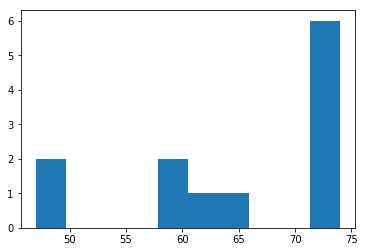

In [217]:
plt.hist([49, 47, 74, 72, 61, 73, 74, 73, 65, 60, 60, 73])

In [164]:
data=A

unique_data = np.unique(data)
resdata = []
for ii in unique_data:
    resdata.append(data.count(ii)) 
print(resdata)
 
#自定义函数 e指数形式
def func(x, a,u, sig):
    return  a*(np.exp(-(x - u) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig))*(431+(4750/x))

#定义x、y散点坐标
x = unique_data
x=np.array(x)
print('x is :\n',x)
num = resdata
y = np.array(num)
print('y is :\n',y)

popt, pcov = curve_fit(func,x,y,p0=[30,100,40])
#获取popt里面是拟合系数
a = popt[0]
u = popt[1]
sig = popt[2]

yvals = func(x,a,u,sig) #拟合y值
print(u'系数a:', a)
print(u'系数u:', u)
print(u'系数sig:', sig)


[9, 11]
x is :
 [62 63]
y is :
 [ 9 11]


TypeError: Improper input: N=3 must not exceed M=2

In [96]:
q = stats.norm.cdf(recent_r,loc = u,scale = sig)

In [97]:
q

1.135795640362105e-20

In [98]:
1-q

1.0

In [139]:
np.mean(A)

44.121212121212125

In [166]:
grouped_realtime_dict[1]

,0,1,99,100,101,102,103,104,105,106,...,114,115,116,117,118,119,120,121,122,cluster
486,32618842,1360099076,37,27,15,15,10,4,16,32,...,80,87,74,60,63,65,70,51,56,1
775,35859802,1771794800,31,23,12,2,3,2,3,24,...,55,52,64,52,55,49,51,56,45,1
778,35860251,35860252,29,28,8,5,3,2,2,37,...,52,64,61,57,72,52,47,51,43,1
2627,252853233,1298058656,52,35,16,9,6,11,10,40,...,102,89,87,56,38,45,49,44,33,1
3010,264827526,1190930467,53,52,25,17,15,12,15,49,...,88,88,68,44,72,67,40,68,60,1
4352,279857253,1771677045,40,29,18,11,5,5,7,19,...,74,63,80,74,72,64,70,55,70,1
4754,287959450,287963826,47,33,14,7,6,5,12,26,...,62,64,74,83,75,77,82,55,69,1
4838,287964816,296314021,39,32,14,8,4,7,10,33,...,51,64,60,72,60,62,77,50,63,1
4989,288193610,1771677049,40,29,18,11,5,5,7,19,...,74,64,79,75,71,66,67,55,70,1
4990,288193881,288194124,40,29,18,11,5,5,7,19,...,74,63,80,72,74,64,70,55,70,1


In [178]:
temp_realtime_list = []
cluster_realtime = {}

for i in range(k):
    temp_realtime_list = []
    for j in range(24):
        temp_realtime_list.append(grouped_realtime_dict[i][99+j].tolist())
    cluster_realtime[i] = temp_realtime_list

In [182]:
type(cluster_realtime)

dict

In [177]:
type(grouped_realtime_dict[200][99].tolist())

list

In [187]:
cluster_realtime[10]

[[19,
  19,
  19,
  19,
  19,
  19,
  18,
  19,
  19,
  19,
  19,
  39,
  36,
  36,
  39,
  39,
  18,
  18,
  18,
  18,
  18,
  19,
  36,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  36,
  36,
  49,
  10,
  10,
  10,
  10,
  18,
  39],
 [9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  19,
  18,
  18,
  19,
  19,
  6,
  6,
  6,
  6,
  6,
  9,
  18,
  6,
  6,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  18,
  18,
  24,
  4,
  4,
  4,
  4,
  6,
  20],
 [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  12,
  11,
  11,
  12,
  12,
  1,
  1,
  1,
  1,
  1,
  3,
  11,
  1,
  1,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  11,
  11,
  7,
  1,
  1,
  1,
  1,
  1,
  11],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  3,
  3,
  3,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  3,
  3,
  1,
  1,
  1,
  1,
  0,
  3],
 [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3,
  2,
  2,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  1,
  2,
 

In [237]:
from scipy import stats
import matplotlib.pyplot as plt

def kde_cal(x1): 
#     x1 =np.array(grouped_realtime_dict[2][99].values.tolist())
    kde1 = stats.gaussian_kde(x1)

    fig = plt.figure()
    ax = fig.add_subplot(111)

    x_eval = np.linspace(min(x1)-10, max(x1)+10, num=500)
    ax.plot(x_eval, kde1(x_eval), 'k-', label="Scott's Rule")

    plt.show
    A=kde1(x_eval)
    m=min(x1)
    k=int(np.round(500*(m-(min(x1)-10))/(max(x1)-min(x1)+20)))
#     print(min(x1))
    cdf=0
    for i in range(k):
        cdf=A[i]+A[i+1]
    print(cdf*(max(x1)-min(x1)+20)/500)


In [223]:
sum(kde1(x_eval))*67/400

1.2473040016574806

In [227]:
cdf

126

In [202]:
100*(m-(min(x1)-5))/(max(x1)-min(x1)+10)

-113.51351351351352

In [229]:
kde1

In [241]:
grouped_realtime_dict[0][100]

9         0
32        0
33        0
51        0
57        0
61        0
68        0
78        0
79        0
107       0
110       0
111       0
118       0
119       0
125       0
152       0
193       0
194       0
203       0
206       0
207       0
208       0
229       0
246       0
250       0
254       0
258       0
259       0
264       0
266       0
         ..
126990    0
126991    0
126992    0
126994    0
126995    0
126996    0
126997    0
126998    0
127000    0
127005    0
127006    0
127007    0
127012    0
127013    0
127014    0
127023    0
127024    0
127026    1
127027    0
127030    0
127031    0
127038    0
127039    0
127040    0
127041    0
127042    0
127043    0
127044    0
127046    0
127047    0
Name: 100, Length: 73503, dtype: int64